In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv",header=None)

In [4]:
data

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100
...,...,...
157,2017,18000000000
158,2017,19200000000
159,2018,8876000000
160,2018,23600000000


In [5]:
data.values  #converting into numpy array

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [6]:
data=data.values  #stroing it in data

In [7]:
x=data[:,0] #Extract 1st row which is feature here

In [8]:
x[0:10] #features are 1D here, but 2D array is expected

array([1971, 1972, 1973, 1973, 1974, 1974, 1974, 1975, 1976, 1976],
      dtype=int64)

In [9]:
len(x)

162

In [10]:
x.reshape(-1,1)[0:5]
#same as x.reshape(162,1)
#reshaping features from 1D to 2D array
#-1 here repersents 1st dimension which is length of array, -1 means by default length of array

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974]], dtype=int64)

In [11]:
x=data[:,0].reshape(-1,1)
y=data[:,1]

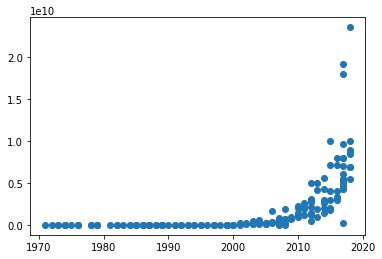

In [12]:
plt.scatter(x,y)

converting into linear model by taking log only on y because it is our count and in equation after tking log we have logc i.e. log on count variable where as x variable i.e. time is same as t and hence as x here

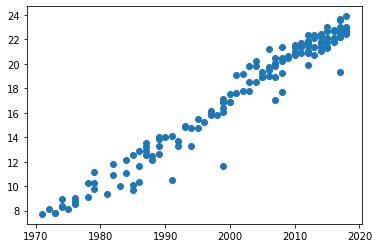

In [13]:
y=np.log(y)
plt.scatter(x,y)

In [14]:
x[0:5]

array([[1971],
       [1972],
       [1973],
       [1973],
       [1974]], dtype=int64)

Centering x so that x is near to zero and not dividing by variance i.e. normalization as x is years this will differ its increase in count by 1

In [15]:
x=x-x.mean() 

In [16]:
x[70:75]

array([[2.80246914],
       [3.80246914],
       [4.80246914],
       [5.80246914],
       [0.80246914]])

In [17]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
#No activation function as it is regression and in regression we dont want to limit output between 0 and 1

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch, lr):
    if(epoch>=50):
        return 0.001
    return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

r=model.fit(x,y, epochs=200, callbacks=[scheduler])

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 1s 4ms/sample - loss: 323.2366
Epoch 2/200
162/162 [==============================] - 0s 129us/sample - loss: 295.0497
Epoch 3/200
162/162 [==============================] - 0s 136us/sample - loss: 330.7481
Epoch 4/200
162/162 [==============================] - 0s 135us/sample - loss: 474.9144
Epoch 5/200
162/162 [==============================] - 0s 136us/sample - loss: 266.6289
Epoch 6/200
162/162 [==============================] - 0s 142us/sample - loss: 220.8065
Epoch 7/200
162/162 [==============================] - 0s 129us/sample - loss: 161.2649
Epoch 8/200
162/162 [==============================] - 0s 129us/sample - loss: 132.0937
Epoch 9/200
162/162 [==============================] - 0s 129us/sample - loss: 61.5697
Epoch 10/200
162/162 [==============================] - 0s 129us/sample - loss: 57.3795
Epoch 11/200
162/162 [==============================] - 0s 142us/sample - loss: 52.6177
Epoch 12/200
1

162/162 [==============================] - 0s 111us/sample - loss: 0.9176
Epoch 95/200
162/162 [==============================] - 0s 117us/sample - loss: 0.8583
Epoch 96/200
162/162 [==============================] - 0s 117us/sample - loss: 0.8970
Epoch 97/200
162/162 [==============================] - 0s 111us/sample - loss: 0.9018
Epoch 98/200
162/162 [==============================] - 0s 105us/sample - loss: 0.9399
Epoch 99/200
162/162 [==============================] - 0s 111us/sample - loss: 0.8990
Epoch 100/200
162/162 [==============================] - 0s 105us/sample - loss: 0.9169
Epoch 101/200
162/162 [==============================] - 0s 105us/sample - loss: 0.9711
Epoch 102/200
162/162 [==============================] - 0s 117us/sample - loss: 1.0430
Epoch 103/200
162/162 [==============================] - 0s 111us/sample - loss: 1.0883
Epoch 104/200
162/162 [==============================] - 0s 117us/sample - loss: 0.9189
Epoch 105/200
162/162 [============================

162/162 [==============================] - 0s 129us/sample - loss: 0.8879
Epoch 188/200
162/162 [==============================] - 0s 148us/sample - loss: 0.8971
Epoch 189/200
162/162 [==============================] - 0s 129us/sample - loss: 0.8858
Epoch 190/200
162/162 [==============================] - 0s 135us/sample - loss: 0.9287
Epoch 191/200
162/162 [==============================] - 0s 135us/sample - loss: 1.3289
Epoch 192/200
162/162 [==============================] - 0s 154us/sample - loss: 1.4773
Epoch 193/200
162/162 [==============================] - 0s 142us/sample - loss: 1.3731
Epoch 194/200
162/162 [==============================] - 0s 111us/sample - loss: 1.3980
Epoch 195/200
162/162 [==============================] - 0s 117us/sample - loss: 1.3878
Epoch 196/200
162/162 [==============================] - 0s 117us/sample - loss: 1.3298
Epoch 197/200
162/162 [==============================] - 0s 105us/sample - loss: 1.4020
Epoch 198/200
162/162 [=======================

Printing loss with number of epochs

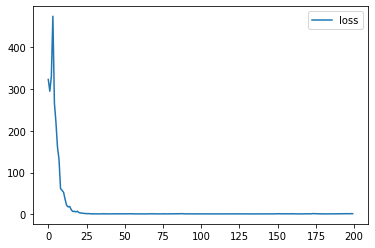

In [18]:
plt.plot(r.history['loss'],label="loss")
plt.legend()

Printing layers in the model, here only 1 layer is there Dense, input layer is just for supporting it

In [19]:
print(model.layers) 

Printing weights from 1st layer i.e. Dense layer by get_weights() in-built function

In [20]:
print(model.layers[0].get_weights())

[array([[0.3854809]], dtype=float32), array([17.775047], dtype=float32)]


Here we get 2 things, 1st is 2-D array which denotes slope 'm' and 2nd is 1-D array which denotes constant 'b' in equation y=mx+c

In [21]:
a=model.layers[0].get_weights()[0][0,0]  #just printing scalar value of weight which is of 1st layer 

In [22]:
print("Time to double: ",np.log(2)/a)

Time to double:  1.7981362023598582


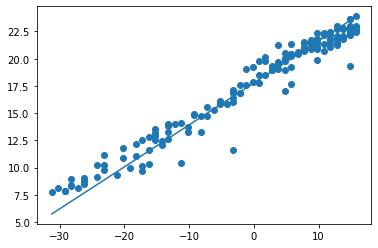

In [28]:
yhat=model.predict(x).flatten()
plt.scatter(x,y)
plt.plot(x,yhat)

In [30]:
w, b=model.layers[0].get_weights()

In [33]:
x=x.reshape(-1,1)

In [34]:
yhat2=(x.dot(w)+b).flatten()

In [37]:
np.allclose(yhat,yhat2)

True

# Saving the model

In [44]:
model.save("C://Users/shash/Downloads/Jupytor/Tensorflow 2.0/linearregression.h5")

In [45]:
model=tf.keras.models.load_model("C://Users/shash/Downloads/Jupytor/Tensorflow 2.0/linearregression.h5")

In [46]:
print(model.layers)

In [47]:
model.evaluate(x,y)

162/162 [==============================] - 0s 462us/sample - loss: 1.2276


1.2276394334104326